In [45]:
country = 'USA'

In [46]:
# для автозагрузки изменений в модулях без необходимости перезагрузки kelner
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from CovidHandlers import get_df_by_country
%matplotlib inline
# sns.set_style('whitegrid')
plt.style.use('ggplot')
sns.set(rc={'figure.figsize':(10, 8)})

In [48]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [49]:
# pd.set_option('display.max_rows', 500)

In [50]:
confirmed_df = pd.read_csv('csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv')
death_df = pd.read_csv('csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_US.csv')

In [57]:
df = get_df_by_country(country)

In [61]:
# Фильтр по количеству зарегистрированных случаев
min_cases = 50
df = df[df['Confirmed'] >= min_cases]

# df.reset_index(inplace=True)

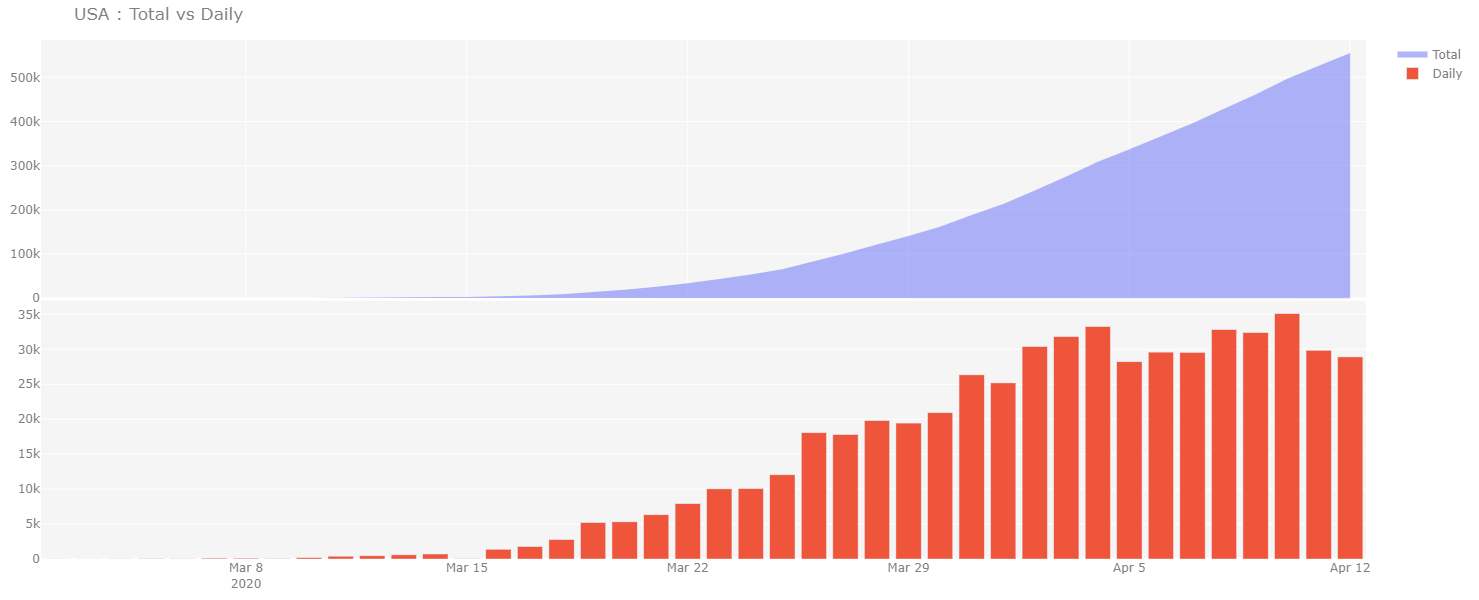

In [62]:
fig = make_subplots(rows=2, cols=1, shared_xaxes=True, vertical_spacing=0.005)
fig.append_trace(go.Scatter(
    x=df.index,
    y=df['Confirmed'],
    mode='none',
    name='Total',
    fill='tozeroy'),
    row=1, col=1)

fig.append_trace(go.Bar(
    x=df.index,
    y=df['Confirmed Daily'],
    name='Daily'),
    row=2, col=1)

fig.update_layout(
    margin=dict(l=10, r=10, t=40, b=10), width=900, height=600, plot_bgcolor='rgb(245,245,245)',
    title=country + ' : Total vs Daily',
     font=dict(
#         family="Courier New, monospace",
        size=12,
        color="#7f7f7f"
    )
)
fig.show()

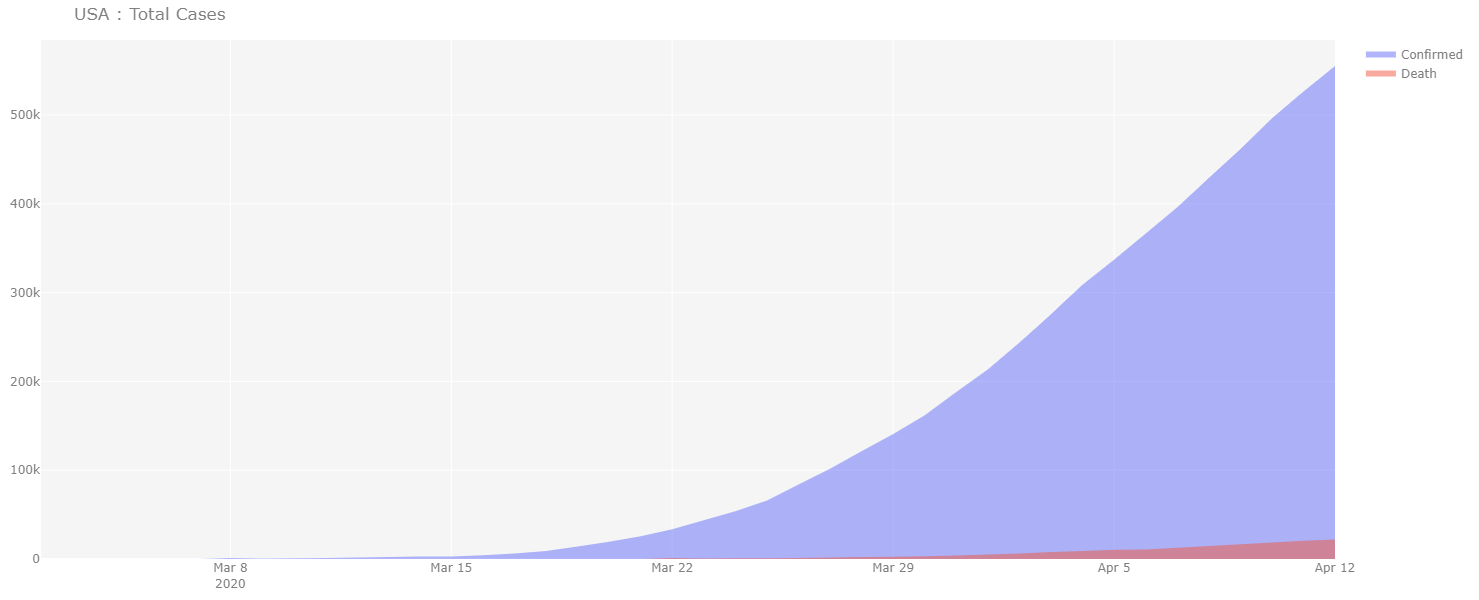

In [63]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=df.index, y=df['Confirmed'], name='Confirmed', fill='tozeroy', mode='none')) # fill down to xaxis
fig.add_trace(go.Scatter(x=df.index, y=df['Death'], name='Death', fill='tozeroy', mode='none')) # fill to trace0 y
# fig.add_trace(go.Scatter(x=df.index, y=df['Recovery'], name='Recovery', fill='tozeroy', mode='none')) # fill to trace0 y

fig.update_layout(
    margin=dict(l=10, r=10, t=40, b=10), width=1100, height=600, plot_bgcolor='rgb(245,245,245)',
    title=country + ' : Total Cases',
     font=dict(
#         family="Courier New, monospace",
        size=12,
        color="#7f7f7f"
    )
)
   
fig.show()

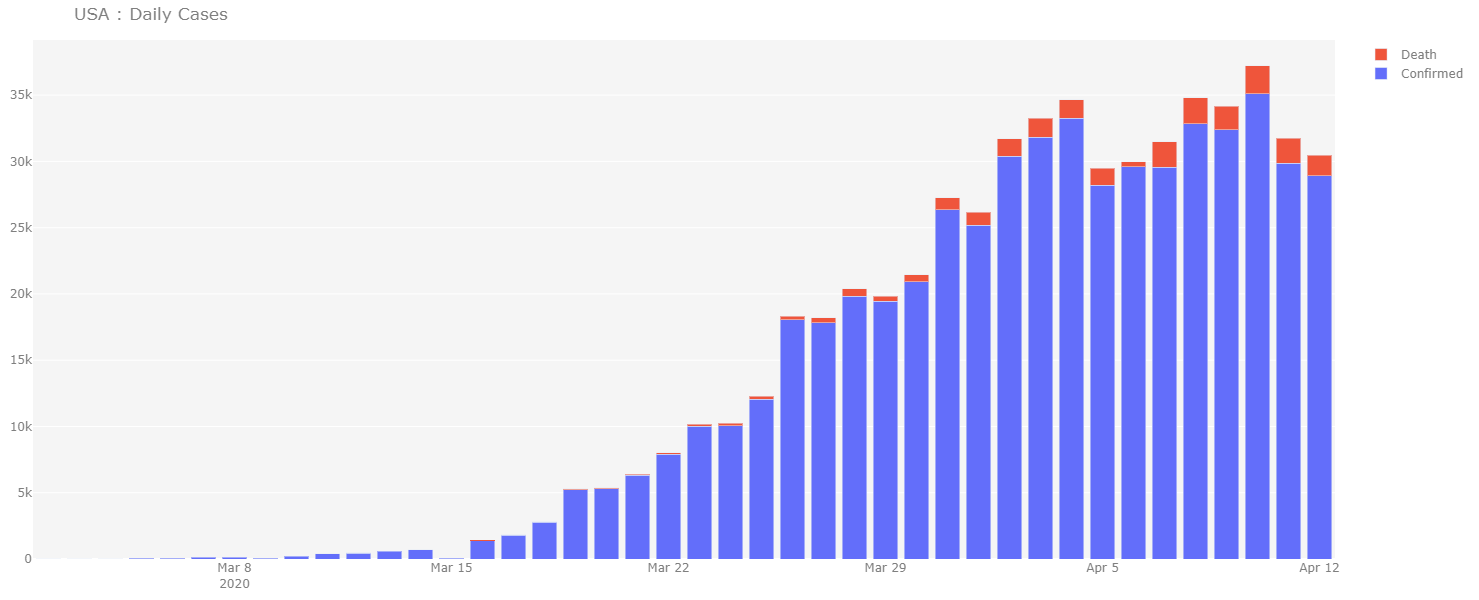

In [64]:
fig = go.Figure()
fig.add_trace(go.Bar(x=df.index, y=df['Confirmed Daily'], name='Confirmed')) # fill down to xaxis
fig.add_trace(go.Bar(x=df.index, y=df['Death Daily'], name='Death')) # fill to trace0 y
# fig.add_trace(go.Bar(x=df.index, y=df['Recovery Daily'], name='Recovery')) # fill to trace0 y

fig.update_layout(
    margin=dict(l=10, r=10, t=40, b=10), width=1100, height=600, plot_bgcolor='rgb(245,245,245)',
    title=country + ' : Daily Cases',
     font=dict(
#         family="Courier New, monospace",
        size=12,
        color="#7f7f7f"
    ),
    barmode='stack'
)
fig.show()